# Travel Insurance - Marketing Analysis (Practice Case Study)

### INTRODUCTION

This notebook contains the case study of travel insurance from Travel Assured! Travel Assured is a travel insurance
company. Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than
ever that they advertise in the right places and to the right people.

Travel Assured has plenty of data on their current customers as well as people who got quotes but never bought insurance.
They want to know if there are differences in the travel habits between customers and non-customers - they believe they
are more likely to travel often (buying tickets from frequent flyer miles) and travel abroad. Our business task is to
uncover any insights from these data that might help the marketing strategy.

### ASK

From our business task, we can ask the following questions:

 - **What are the differences in the travel habits between customers and non-customers?**

 - **How can these travel habits be turned into marketing opportunities?**

### PREPARE

Since the data set for our project was provided by a primary data source: Travel Assured, we are assured that the data
is reliable. However it is a good practice that we check the data before we begin to carry on any analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**SETUP**

Loading in the required libraries and taking a look at the first few lines of the data provided.

In [2]:
df = pd.read_csv('travel_insurance.csv')
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**OBSERVATION**

Looking at the data provided, it appears fairly well labelled and organized. Some tidying can be done to make the data easier to work with. It also appears that many of the variables are categorical. This has been noted for now, we will continue on to further explore the data provided.

In [3]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   EmploymentType       1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987,1987,1.987000e+03,1987.000000,1987.000000,1987,1987,1987.000000
unique,NaN,2,2,NaN,NaN,NaN,2,2,NaN
top,NaN,Private Sector/Self Employed,Yes,NaN,NaN,NaN,No,No,NaN
freq,NaN,1417,1692,NaN,NaN,NaN,1570,1607,NaN
mean,29.650226,NaN,NaN,9.327630e+05,4.752894,0.277806,NaN,NaN,0.357323
std,2.913308,NaN,NaN,3.768557e+05,1.609650,0.448030,NaN,NaN,0.479332
min,25.000000,NaN,NaN,3.000000e+05,2.000000,0.000000,NaN,NaN,0.000000
25%,28.000000,NaN,NaN,6.000000e+05,4.000000,0.000000,NaN,NaN,0.000000
50%,29.000000,NaN,NaN,9.000000e+05,5.000000,0.000000,NaN,NaN,0.000000
75%,32.000000,NaN,NaN,1.250000e+06,6.000000,1.000000,NaN,NaN,1.000000


**OBSERVATION**

Calling describe on the data seems to confirm the assumption that most variables are categorical with 2 levels. Key statistics will be gleamed from data after dummy variables have been coded. 

In [4]:
df_dummy = pd.get_dummies(df, drop_first=True)

# Rename columns for readability; attempted to keep the same naming convention used
df_dummy.columns = ['Age', 'AnnualIncome(k$)', 'FamilyMembers',
                    'HealthIssues', 'Insured', 'PrivateSector',
                    'Graduate', 'FrequentFlyer', 'TravelledAbroad']

# Converting AnnualIncome to be in k$
df_dummy['AnnualIncome(k$)'] = df_dummy['AnnualIncome(k$)'] / 1000

# Data after column rename
df_dummy.describe().round(3)

,Age,AnnualIncome(k$),FamilyMembers,HealthIssues,Insured,PrivateSector,Graduate,FrequentFlyer,TravelledAbroad
count,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000,1987.000
mean,29.650,932.763,4.753,0.278,0.357,0.713,0.852,0.210,0.191
std,2.913,376.856,1.610,0.448,0.479,0.452,0.356,0.407,0.393
min,25.000,300.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,28.000,600.000,4.000,0.000,0.000,0.000,1.000,0.000,0.000
50%,29.000,900.000,5.000,0.000,0.000,1.000,1.000,0.000,0.000
75%,32.000,1250.000,6.000,1.000,1.000,1.000,1.000,0.000,0.000
max,35.000,1800.000,9.000,1.000,1.000,1.000,1.000,1.000,1.000


**OBSERVATION**

Completing the tidying of the data provided, column names were renamed for readability while attempting to keep the same naming convention. With the dummy variables coded, we can see that indeed the data provided is reliable. There are no significant outliers or missing values.

### DATA VISUALIZATION

([<matplotlib.axis.XTick at 0x23345fbf9d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

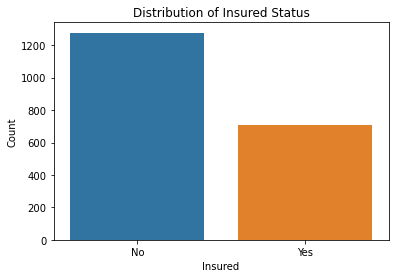

In [6]:
sns.countplot(x='Insured', data=df_dummy)
plt.title('Distribution of Insured Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

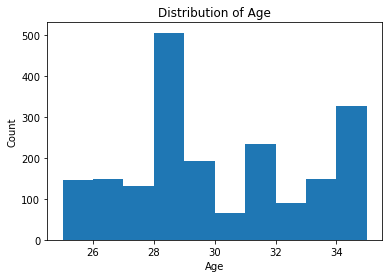

In [7]:
df_dummy.hist('Age')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(b=None)
plt.savefig('age_distribution.png')

In [8]:
age_28 = df_dummy[(df_dummy['Age'] == 28)]
age_28.describe().round(3)

,Age,AnnualIncome(k$),FamilyMembers,HealthIssues,Insured,PrivateSector,Graduate,FrequentFlyer,TravelledAbroad
count,506.0,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,28.0,811.858,4.767,0.281,0.208,0.771,0.957,0.158,0.085
std,0.0,334.291,1.597,0.450,0.406,0.421,0.204,0.365,0.279
min,28.0,300.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,28.0,550.000,4.000,0.000,0.000,1.000,1.000,0.000,0.000
50%,28.0,800.000,4.500,0.000,0.000,1.000,1.000,0.000,0.000
75%,28.0,1150.000,6.000,1.000,0.000,1.000,1.000,0.000,0.000
max,28.0,1750.000,9.000,1.000,1.000,1.000,1.000,1.000,1.000


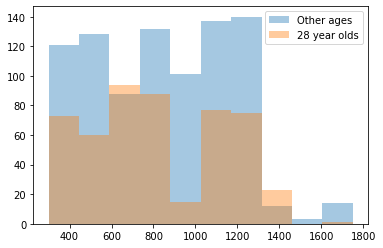

In [10]:
plt.hist('AnnualIncome(k$)', data=not_28, label='Other ages', alpha=0.4)
plt.hist('AnnualIncome(k$)', data=age_28, label='28 year olds', alpha=0.4)
plt.legend()

**OBSERVATION**

Age distribution shows that there is a high number of 28 year old travellers. Next step is to see if there is any visible connections between age and income for travellers based on their insured status. 

In [11]:
# Separate by insured vs uninsured
insured = df_dummy[df_dummy['Insured'] == 1]
uninsured = df_dummy[df_dummy['Insured'] == 0]

# Drop the insured columns
insured = insured.drop(columns='Insured')
uninsured = uninsured.drop(columns='Insured')

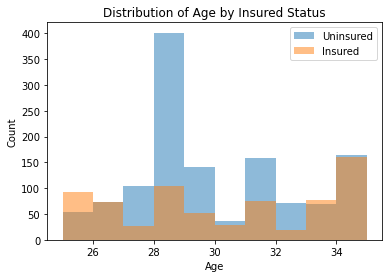

In [12]:
plt.hist('Age', data=df_dummy[df_dummy['Insured']==0], alpha=0.5, label='Uninsured')
plt.hist('Age', data=df_dummy[df_dummy['Insured']==1], alpha=0.5, label='Insured')
plt.title('Distribution of Age by Insured Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.savefig('age_distribution_insured.png')

**OBSERVATION**

Based on the data set it appears that older individuals may have a higher proportion of purchasing insurance. However, the data does not clearly illustrate any meaningful insights. Will visualize annual income to determine if any insights can be gleamed.

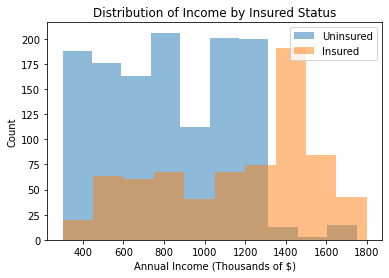

In [13]:
plt.hist('AnnualIncome(k$)', data=uninsured, alpha=0.5, label='Uninsured')
plt.hist('AnnualIncome(k$)', data=insured, alpha=0.5, label='Insured')
plt.title('Distribution of Income by Insured Status')
plt.xlabel('Annual Income (Thousands of $)')
plt.ylabel('Count')
plt.legend()
plt.savefig('age_distribution_income.png')

Text(0.5, 1.0, 'Age to Income, Colored by Insured Status')

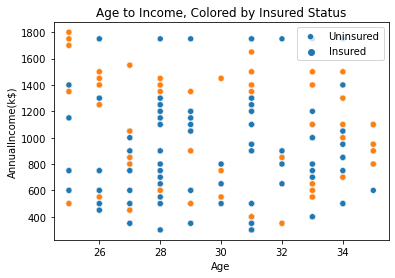

In [60]:
# Annual income by insured status scatterplot
sns.scatterplot(x='Age', y='AnnualIncome(k$)', hue='Insured', data=df_dummy, legend=True)
plt.legend(labels=['Uninsured', 'Insured'])
plt.title('Age to Income, Colored by Insured Status')
# plt.savefig('age_income_scatterplot.png')

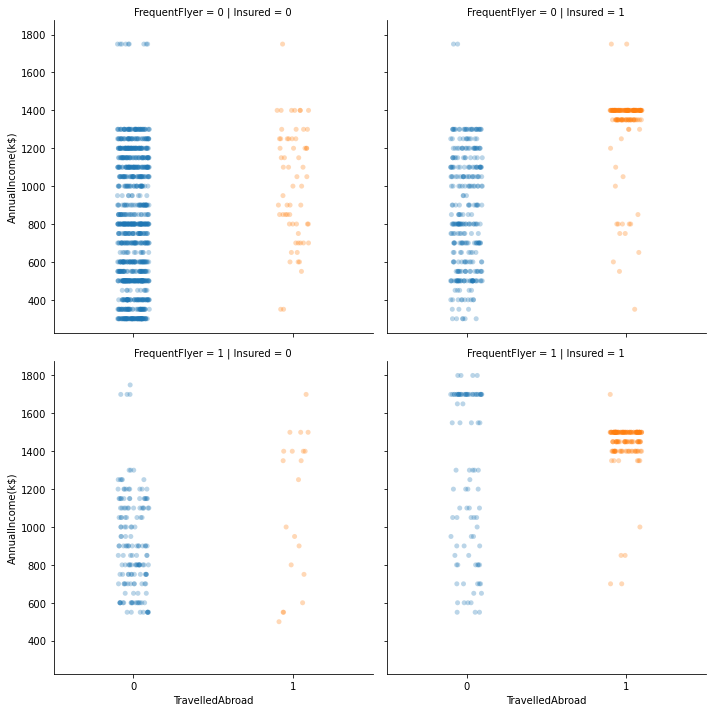

In [43]:
sns.catplot(x='TravelledAbroad', y='AnnualIncome(k$)', data=df_dummy, alpha=0.3, col='Insured', row='FrequentFlyer')


In [49]:
under_130k = df_dummy[df_dummy['AnnualIncome(k$)'] < 1300]
over_130k = df_dummy[df_dummy['AnnualIncome(k$)'] > 1300]

In [51]:
under_130k.describe().round(3)

,Age,AnnualIncome(k$),FamilyMembers,HealthIssues,Insured,PrivateSector,Graduate,FrequentFlyer,TravelledAbroad
count,1547.00,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000,1547.000
mean,29.66,788.429,4.781,0.278,0.231,0.669,0.845,0.135,0.053
std,2.70,289.162,1.627,0.448,0.421,0.471,0.362,0.342,0.224
min,25.00,300.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,28.00,550.000,4.000,0.000,0.000,0.000,1.000,0.000,0.000
50%,29.00,800.000,5.000,0.000,0.000,1.000,1.000,0.000,0.000
75%,32.00,1050.000,6.000,1.000,0.000,1.000,1.000,0.000,0.000
max,35.00,1250.000,9.000,1.000,1.000,1.000,1.000,1.000,1.000


In [52]:
over_130k.describe().round(3)

,Age,AnnualIncome(k$),FamilyMembers,HealthIssues,Insured,PrivateSector,Graduate,FrequentFlyer,TravelledAbroad
count,349.000,349.000,349.000,349.000,349.000,349.000,349.000,349.000,349.000
mean,28.914,1476.791,4.642,0.278,0.911,0.946,0.871,0.573,0.834
std,3.436,119.770,1.572,0.449,0.285,0.227,0.336,0.495,0.373
min,25.000,1350.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,26.000,1400.000,3.000,0.000,1.000,1.000,1.000,0.000,1.000
50%,28.000,1450.000,4.000,0.000,1.000,1.000,1.000,1.000,1.000
75%,33.000,1500.000,6.000,1.000,1.000,1.000,1.000,1.000,1.000
max,34.000,1800.000,9.000,1.000,1.000,1.000,1.000,1.000,1.000


**OBSERVATION**

Visualization of annual income shows a much clearer trend. It is clear from the first graph that individuals with income less than 130,000 tend to not purchase insurance. In contrast, individuals with income over 130,000 tend to purchase insurance.

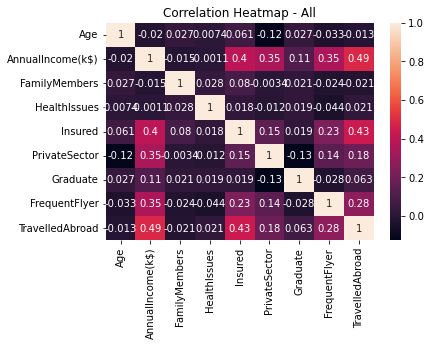

In [53]:
sns.heatmap(df_dummy.corr(), annot=True)
plt.title('Correlation Heatmap - All')
plt.savefig('Correlation Heatmap - All.png')

**OBERSERVATION**

Running a heatmap to determine correlation shows some areas of interest:
- Annual Income and Private Sector
- Annual Income and Frequent Flyers
- Annual Income and Travelled Abroad

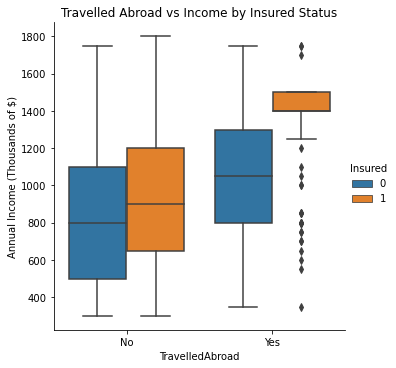

In [19]:
sns.catplot(x='TravelledAbroad', y='AnnualIncome(k$)', hue='Insured', kind='box', data=df_dummy)
plt.ylabel('Annual Income (Thousands of $)')
plt.title('Travelled Abroad vs Income by Insured Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('ta_income.png')

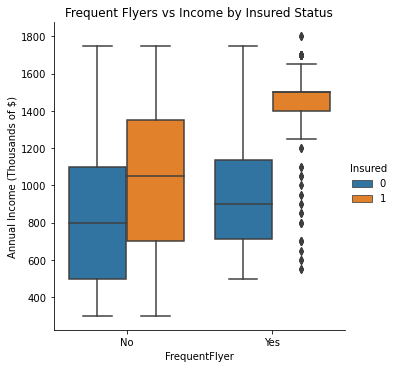

In [20]:
sns.catplot(x='FrequentFlyer', y='AnnualIncome(k$)', hue='Insured', kind='box', data=df_dummy)
plt.ylabel('Annual Income (Thousands of $)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Frequent Flyers vs Income by Insured Status')
plt.savefig('ff_income.png')

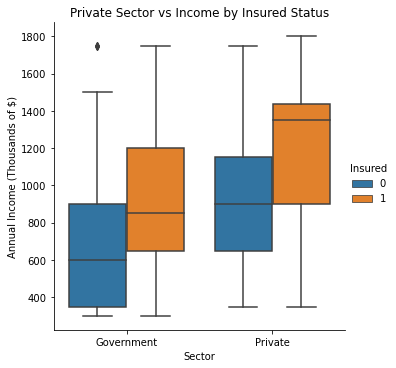

In [21]:
sns.catplot(x='PrivateSector', y='AnnualIncome(k$)', hue='Insured', kind='box', data=df_dummy)
plt.ylabel('Annual Income (Thousands of $)')
plt.xlabel('Sector')
plt.xticks([0, 1], ['Government', 'Private'])
plt.title('Private Sector vs Income by Insured Status')
plt.savefig('privatesec_income.png')

**OBSERVATION**

The boxplots above do indeed illustrate that higher wage earner tend to be insured. The next step is to determine if any other correlations can be gained by visualizing the corresponding heatmaps for insured vs. uninsured.

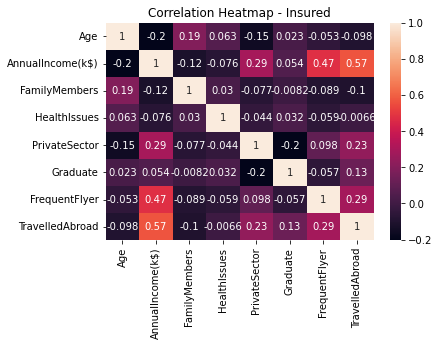

In [22]:
sns.heatmap(insured.corr(), annot=True)
plt.title('Correlation Heatmap - Insured')
plt.savefig('insured_heatmap.png')

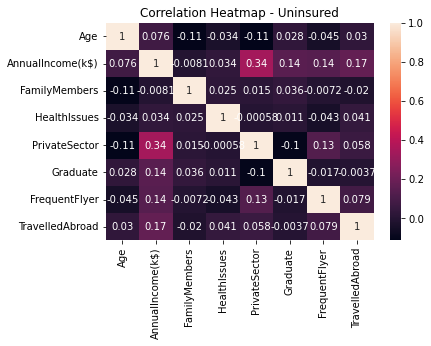

In [23]:
sns.heatmap(uninsured.corr(), annot=True)
plt.title('Correlation Heatmap - Uninsured')
plt.savefig('uninsured_heatmap.png')

In [24]:
insured.describe().round(3)

,Age,AnnualIncome(k$),FamilyMembers,HealthIssues,PrivateSector,Graduate,FrequentFlyer,TravelledAbroad
count,710.000,710.000,710.000,710.000,710.000,710.000,710.000,710.000
mean,29.889,1133.239,4.925,0.289,0.803,0.861,0.337,0.420
std,3.332,374.845,1.678,0.453,0.398,0.347,0.473,0.494
min,25.000,300.000,2.000,0.000,0.000,0.000,0.000,0.000
25%,27.000,800.000,4.000,0.000,1.000,1.000,0.000,0.000
50%,30.000,1250.000,5.000,0.000,1.000,1.000,0.000,0.000
75%,33.000,1400.000,6.000,1.000,1.000,1.000,1.000,1.000
max,35.000,1800.000,9.000,1.000,1.000,1.000,1.000,1.000


### SUMMARY STATISTICS OF CUSTOMERS (INSURED TRAVELLERS)
- Average Age: 29.9 years old
- Average Annual Income: 1,133,239
- Average Family Members: 4.93
- 28.9 percent of insured flyers have Chronic Diseases
- 80.3 percent of insured flyers work in Private Sector/Self Employed
- 86.1 percent of insured flyers have Graduated
- 33.7 percent of insured flyers are Frequent Flyers
- 42.0 percent of insured flyers have Travelled Abroad

In [25]:
uninsured.describe().round(3)

,Age,AnnualIncome(k$),FamilyMembers,HealthIssues,PrivateSector,Graduate,FrequentFlyer,TravelledAbroad
count,1277.000,1277.000,1277.000,1277.000,1277.000,1277.000,1277.000,1277.000
mean,29.518,821.300,4.657,0.272,0.663,0.847,0.139,0.064
std,2.644,328.899,1.563,0.445,0.473,0.361,0.346,0.245
min,25.000,300.000,2.000,0.000,0.000,0.000,0.000,0.000
25%,28.000,550.000,4.000,0.000,0.000,1.000,0.000,0.000
50%,29.000,800.000,4.000,0.000,1.000,1.000,0.000,0.000
75%,31.000,1100.000,6.000,1.000,1.000,1.000,0.000,0.000
max,35.000,1750.000,9.000,1.000,1.000,1.000,1.000,1.000


**OBSERVATION**

Overall the data shows that Annual Income, Frequent Flyers, and Travelled Abroad affects insurance purchases. Nothing else is strongly correlated enough to make a determination.

### SUMMARY STATISTICS OF DATA SET
**35.7 percent of flyers have Travel Insurance**
***
 - Average Age: 29.65 years old
 - Average Annual Income is 932,763
 - Average Family Members: 4.75

 - 27.8 percent of flyers have Chronic Diseases
 - 71.3 percent of flyers work in the Private Sector/Self-Employed
 - 85.1 percent of flyers are graduates
 - 20.9 percent of flyers are frequent flyers
 - 19.1 percent of flyers have travelled abroad 

### SUMMARY STATISTICS OF NON-CUSTOMERS (UNINSURED TRAVELLERS)
- Average Age: 29.5 years old
- Average Annual Income: 821,300
- Average Family Members: 4.66
- 27.2 percent of uninsured flyers have Chronic Diseases
- 66.3 percent of uninsured flyers work in Private Sector/Self Employed
- 84.7 percent of uninsured flyers have Graduated
- 13.9 percent of uninsured flyers are Frequent Flyers
- 6.4 percent of uninsured flyers have Travelled Abroad

# CONCLUSION
We can recommend that the marketing team focus on the following:
1. travellers with an Annual Income less than 1,400,000;
2. travellers that have Graduated;
3. travellers that are younger than the average uninsured age of 29.5 years old; and
4. travellers that work in the Government Sector